In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#reading the dataset
df= pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#separating x and y and also droping the row number , custid and name
x= df.iloc[:,3:13]
y=df.iloc[:,13]

In [4]:
#creating dummy variables for gender and geography
geography= pd.get_dummies(x['Geography'],drop_first=True) #were dropping the first dummy variable to act as a reference
gender= pd.get_dummies(x['Gender'],drop_first=True)

In [5]:
#concatinating the dummies with the x dataframe
x=pd.concat([x,geography, gender], axis=1)

#now droping the original geog and gender variables with strings
x=x.drop(['Geography','Gender'], axis=1)

In [6]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [7]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [8]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

In [9]:
x_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [10]:
#importing the keras libraries and packages
import keras
from keras.models import Sequential #this is responsible for creating any type of NN
from keras.layers import Dense  # this is for the hidden layers
from keras.layers import LeakyReLU, PReLU, ELU # activation functions
from keras.layers import Dropout #its a regularization parameter

In [11]:
#intialising the ANN
classifier= Sequential()

#adding the input layer and the first hidden layer. the Dense() creates the hidden layer
classifier.add(Dense(units=6, kernel_initializer= 'he_uniform', activation='relu', input_dim=11))

#adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu')) #all hidden layers must be having Relu/
#leakyrelu as they are the most commonactibation functions

#adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform', activation='sigmoid'))

#compiling the ANN
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics= ['accuracy'])
#binary_crossentropy should be prefered when the output is either 0 or 1
#for multiple outcomes, then use categorical_crossentropy

#fitting the ANN to the training set
model_history= classifier.fit (x_train,y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6137 - accuracy: 0.7138 - val_loss: 0.4907 - val_accuracy: 0.8016
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4649 - accuracy: 0.8076 - val_loss: 0.4603 - val_accuracy: 0.8005
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4430 - accuracy: 0.8074 - val_loss: 0.4451 - val_accuracy: 0.8073
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4270 - accuracy: 0.8134 - val_loss: 0.4328 - val_accuracy: 0.8088
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4141 - accuracy: 0.8205 - val_loss: 0.4218 - val_accuracy: 0.8141
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4018 - accuracy: 0.8281 - val_loss: 0.4120 - val_accuracy: 0.8217
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3905 - accuracy: 0.8362 - val_loss: 0.4016 - val_accuracy: 0.8285

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3299 - accuracy: 0.8645 - val_loss: 0.3582 - val_accuracy: 0.8584
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3290 - accuracy: 0.8671 - val_loss: 0.3618 - val_accuracy: 0.8588
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3298 - accuracy: 0.8651 - val_loss: 0.3592 - val_accuracy: 0.8584
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3287 - accuracy: 0.8668 - val_loss: 0.3594 - val_accuracy: 0.8561
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3289 - accuracy: 0.8658 - val_loss: 0.3587 - val_accuracy: 0.8573
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3288 - accuracy: 0.8656 - val_loss: 0.3596 - val_accuracy: 0.8576
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3280 - accuracy: 0.8658 - val_loss: 0.3580 - val_accuracy:

In [12]:
#listing all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


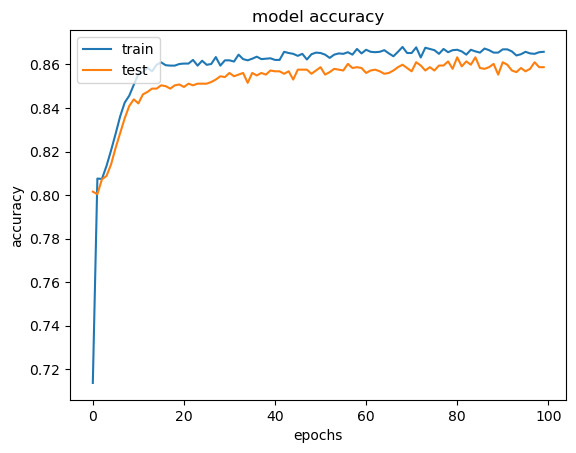

In [13]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#predicting the test results
y_pred= classifier.predict(x_test)

threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)
#y_Pred= (y_pred > 0.5)

#getting the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

63/63 [==============================] - 0s 611us/step
[[1537   58]
 [ 227  178]]


In [16]:
#calculating the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.8575


changing the initializer and adding another hiden layer

In [18]:
#intialising the ANN
classifier1= Sequential()

#adding the input layer and the first hidden layer. the Dense() creates the hidden layer
classifier1.add(Dense(units=10, kernel_initializer= 'he_normal', activation='relu', input_dim=11))

#adding the second hidden layer
classifier1.add(Dense(units=20, kernel_initializer='he_normal', activation='relu')) #all hidden layers must be having Relu/
#leakyrelu as they are the most commonactibation functions

#adding the third hidden layer
classifier1.add(Dense(units=15, kernel_initializer='he_normal', activation='relu')) 

#adding the output layer
classifier1.add(Dense(units=1,kernel_initializer='glorot_uniform', activation='sigmoid'))

#compiling the ANN
classifier1.compile(optimizer='Adam', loss='binary_crossentropy', metrics= ['accuracy'])
#binary_crossentropy should be prefered when the output is either 0 or 1
#for multiple outcomes, then use categorical_crossentropy

#fitting the ANN to the training set
model_history= classifier1.fit (x_train,y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4821 - accuracy: 0.7918 - val_loss: 0.4545 - val_accuracy: 0.7978
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4208 - accuracy: 0.8121 - val_loss: 0.4161 - val_accuracy: 0.8152
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3915 - accuracy: 0.8324 - val_loss: 0.3988 - val_accuracy: 0.8205
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3726 - accuracy: 0.8421 - val_loss: 0.3916 - val_accuracy: 0.8326
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3630 - accuracy: 0.8459 - val_loss: 0.3851 - val_accuracy: 0.8266
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3561 - accuracy: 0.8483 - val_loss: 0.3816 - val_accuracy: 0.8353
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3523 - accuracy: 0.8513 - val_loss: 0.3771 - val_accuracy: 0.8364

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3072 - accuracy: 0.8688 - val_loss: 0.3693 - val_accuracy: 0.8463
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3065 - accuracy: 0.8690 - val_loss: 0.3690 - val_accuracy: 0.8451
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3051 - accuracy: 0.8716 - val_loss: 0.3756 - val_accuracy: 0.8440
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3056 - accuracy: 0.8740 - val_loss: 0.3661 - val_accuracy: 0.8493
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3059 - accuracy: 0.8701 - val_loss: 0.3665 - val_accuracy: 0.8501
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3058 - accuracy: 0.8705 - val_loss: 0.3708 - val_accuracy: 0.8501
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3051 - accuracy: 0.8739 - val_loss: 0.3704 - val_accuracy:

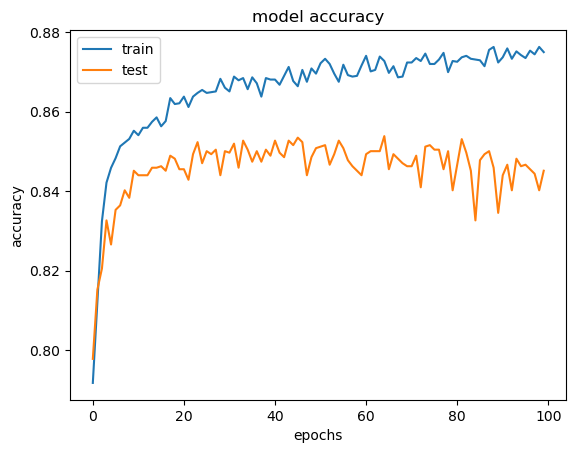

In [19]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [20]:
#predicting the test results
y_pred= classifier1.predict(x_test)

threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)
#y_Pred= (y_pred > 0.5)

#getting the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

63/63 [==============================] - 0s 611us/step
[[1510   85]
 [ 208  197]]


In [21]:
#calculating the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.8535


adding dropout

In [22]:
#intialising the ANN
classifier2= Sequential()

#adding the input layer and the first hidden layer. the Dense() creates the hidden layer
classifier2.add(Dense(units=10, kernel_initializer= 'he_normal', activation='relu', input_dim=11))

classifier2.add(Dropout(0.3))

#adding the second hidden layer
classifier2.add(Dense(units=20, kernel_initializer='he_normal', activation='relu')) #all hidden layers must be having Relu/
#leakyrelu as they are the most commonactibation functions

classifier2.add(Dropout(0.4))

#adding the third hidden layer
classifier2.add(Dense(units=15, kernel_initializer='he_normal', activation='relu')) 

classifier2.add(Dropout(0.2))

#adding the output layer
classifier2.add(Dense(units=1,kernel_initializer='glorot_uniform', activation='sigmoid'))

#compiling the ANN
classifier2.compile(optimizer='Adam', loss='binary_crossentropy', metrics= ['accuracy'])
#binary_crossentropy should be prefered when the output is either 0 or 1
#for multiple outcomes, then use categorical_crossentropy

#fitting the ANN to the training set
model_history= classifier2.fit (x_train,y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5925 - accuracy: 0.7473 - val_loss: 0.4958 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5103 - accuracy: 0.7929 - val_loss: 0.4774 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4876 - accuracy: 0.7949 - val_loss: 0.4592 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4794 - accuracy: 0.7959 - val_loss: 0.4590 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4686 - accuracy: 0.7962 - val_loss: 0.4497 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4629 - accuracy: 0.7960 - val_loss: 0.4455 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4600 - accuracy: 0.7966 - val_loss: 0.4451 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3696 - accuracy: 0.8434 - val_loss: 0.3668 - val_accuracy: 0.8497
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3708 - accuracy: 0.8449 - val_loss: 0.3670 - val_accuracy: 0.8493
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3676 - accuracy: 0.8427 - val_loss: 0.3704 - val_accuracy: 0.8485
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3712 - accuracy: 0.8431 - val_loss: 0.3668 - val_accuracy: 0.8459
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3719 - accuracy: 0.8416 - val_loss: 0.3663 - val_accuracy: 0.8466
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3619 - accuracy: 0.8436 - val_loss: 0.3617 - val_accuracy: 0.8485
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3730 - accuracy: 0.8483 - val_loss: 0.3674 - val_accuracy:

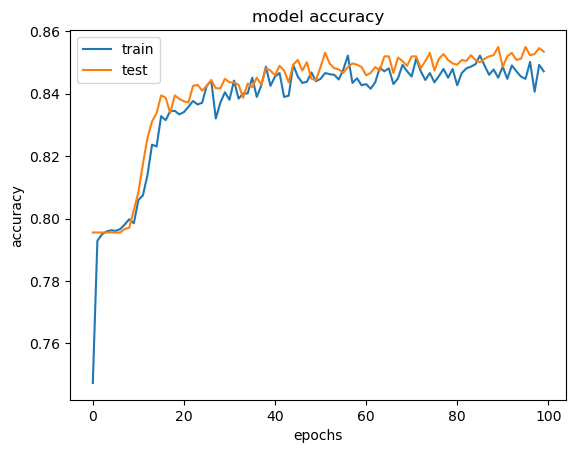

In [23]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [24]:
#predicting the test results
y_pred= classifier2.predict(x_test)

threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)
#y_Pred= (y_pred > 0.5)

#getting the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

63/63 [==============================] - 0s 642us/step
[[1547   48]
 [ 229  176]]


In [25]:
#calculating the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.8615
